In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
wine = load_wine()
X = wine.data
y = wine.target

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

In [10]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)
print("Total explained variance by selected components:", np.sum(explained_variance))

Explained variance by each component: [0.36198848 0.1920749 ]
Total explained variance by selected components: 0.5540633835693531


In [12]:
k = len(np.unique(y)) 
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

C:\Users\sinci\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 260.01666268357695


In [16]:
silhouette = silhouette_score(X_pca, y_kmeans)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.5601697480957202


In [18]:
ari = adjusted_rand_score(y, y_kmeans)
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.8961671105205941


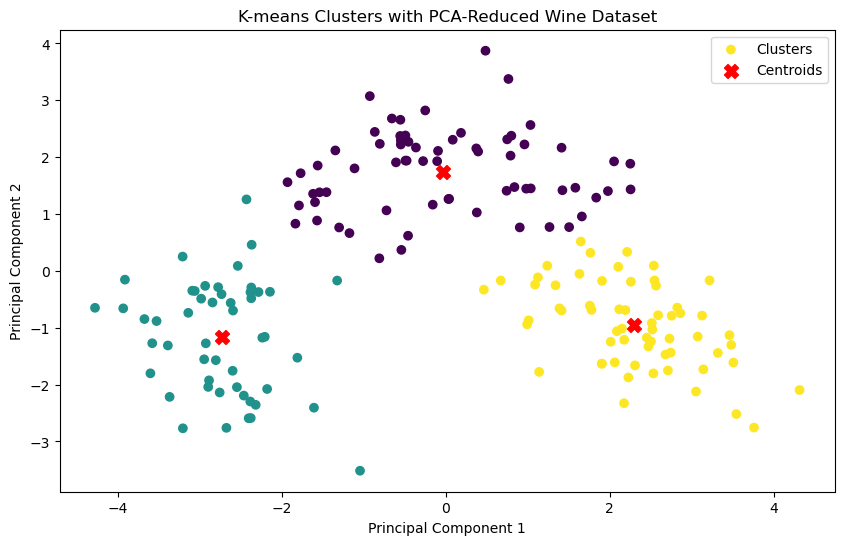

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', label='Clusters')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clusters with PCA-Reduced Wine Dataset')
plt.legend()
plt.show()